In [1]:
from __future__ import division
from neuron import h
from neuron import gui
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

## creating cell object

In [2]:
h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("models/L5PCbiophys3.hoc")
h.load_file("models/L5PCtemplate.hoc")
L5PC = h.L5PCtemplate(morphology_file)

## stimulus settings

In [3]:
stim = h.IClamp(0.5, sec=L5PC.soma[0])
stim.dur   = 5
stim.delay = 150
stim_current = h.Vector()
stim_current.record(stim._ref_i)

syn = h.epsp(L5PC.apic[36](0.9))
syn.tau0  = 0.5
syn.tau1 = 5
syn.onset    = stim.delay + 5
syn_current = h.Vector()
syn_current.record(syn._ref_i)

1.0

## recording settings

In [4]:
t = h.Vector()
t.record(h._ref_t)

soma_v = h.Vector()
soma_v.record(L5PC.soma[0](0.5)._ref_v)

nexus_v = h.Vector()
nexus_v.record(L5PC.apic[36](0.9)._ref_v)

stim_current = h.Vector()
stim_current.record(stim._ref_i);

# general settings

In [5]:
h.v_init = -80
h.tstop = 250
h.celsius = 37

# plotting function

In [6]:
def plot_result(t, soma_v, nexus_v, stim_current, syn_current, show_from = 4400):
    t = np.array(t)[show_from:]
    soma_v = np.array(soma_v)[show_from:]
    nexus_v = np.array(nexus_v)[show_from:]
    stim_current = np.array(stim_current)[show_from:]
    syn_current = np.array(syn_current)[show_from:]
    f, (ax0, ax1, ax2) = plt.subplots(3,1, figsize  = (6.5,3),gridspec_kw = {'height_ratios':[4, 1,1]})
    ax0.plot(t,soma_v,  label = 'soma')
    ax0.plot(t,nexus_v,  label = 'apic[36]')
    ax0.set_ylabel('Voltage (mV)')
    ax0.set_ylim(-80,40)
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)
    ax0.legend(frameon=False)

    ax1.plot(t, np.array(syn_current)*-1, color='red', label='EPSP-like current')
    ax1.set_ylim(-0.02,2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.legend(frameon=False)

    ax2.plot(t, stim_current, color='black', label='step current')
    ax2.set_ylabel('Current (nA)', ha='left', labelpad=15)
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylim(-0.02,2)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.legend(frameon=False)

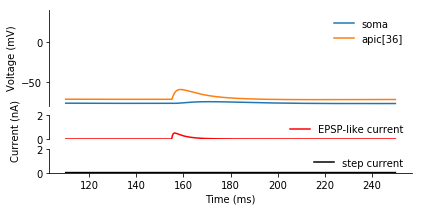

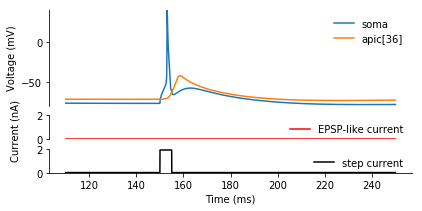

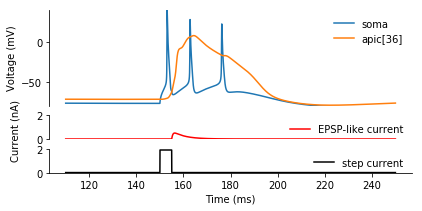

In [7]:
syn.imax = 0.5 
stim.amp = 0
h.run()
plot_result(t, soma_v, nexus_v, stim_current, syn_current)

syn.imax = 0
stim.amp = 1.9
h.run()
plot_result(t, soma_v, nexus_v, stim_current, syn_current)


syn.imax = 0.5
stim.amp = 1.9
h.run()
plot_result(t, soma_v, nexus_v, stim_current, syn_current)
